참고 : https://nbviewer.jupyter.org/gist/FinanceData/288907a51a3dac946337b496beffcd07

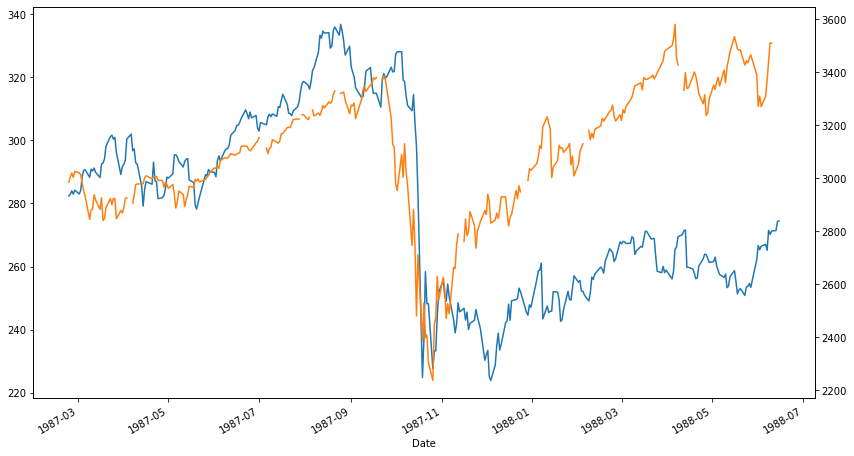

In [1]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime, timedelta

def unix_date(date):
    epoch = datetime(1960, 1, 1)
    t = datetime.strptime(date,'%Y-%m-%d')
    diff = t-epoch
    return(diff.days * 24 * 3600 + diff.seconds)

start_day = unix_date('1960-01-01')
end_day = unix_date(datetime.today().strftime('%Y-%m-%d'))

Ticker = '^GSPC'

url = 'https://query1.finance.yahoo.com/v7/finance/download/' + Ticker + '?period1=' + str(start_day) + '&period2=' + str(end_day) +'&interval=1d&events=history'
asset = pd.read_csv(url, parse_dates=True, index_col='Date')

days240 = timedelta(days=240) # 1년(240), 3년(720)

# Black monday 1987-10-19
black_mondy = datetime(1987,10,19)
ts1 = asset[black_mondy - days240:black_mondy + days240]['Adj Close']

# Pandemic 2020-03-13
start = datetime(2020, 3, 13)
ts2 = asset[start - days240:start + days240]['Adj Close']
ts2.index = ts2.index.shift(-11837, freq='D')

df_plot = pd.DataFrame()
df_plot['Before'] = ts1
df_plot['After'] = ts2
ax1 = df_plot['Before'].plot(figsize=(14,8), label='1987')
# ax1.set_ylim=(0, 340)
ax2 = df_plot['After'].plot(secondary_y=True, label='2020')
# ax2.set_ylim(0,3400)

df_plot.plot